### The data set has information about features of silhouette extracted from the images of different cars

Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.



### 1. Read the dataset using function .dropna() - to avoid dealing with NAs as of now

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import pandas_profiling as pp #EDA

import plotly.express as px #visualization
import plotly.graph_objs as go#visualization
import plotly.offline as py#visualization
import plotly.figure_factory as ff#visualization



import scipy.stats.mstats as zs #standradization

from sklearn.cluster import KMeans
from scipy.spatial import distance



from sklearn.cluster import AgglomerativeClustering 

from scipy.cluster.hierarchy import cophenet, dendrogram, linkage

import matplotlib.pyplot as plt 

from scipy.spatial.distance import pdist  #Pairwise distribution between data points

from scipy.cluster.hierarchy import fcluster

import plotly.io as pio
pio.renderers.default = "png"

In [2]:
df = pd.read_csv("vehicle.csv")


In [3]:
df.sample(5)

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
590,84,44.0,65.0,128.0,55.0,8,150.0,46.0,19.0,148,169.0,325.0,176.0,82.0,1.0,11.0,179.0,183,bus
551,79,39.0,72.0,127.0,53.0,9,142.0,48.0,19.0,135,165.0,295.0,144.0,77.0,7.0,21.0,181.0,189,car
219,85,39.0,57.0,126.0,56.0,6,114.0,58.0,17.0,135,134.0,195.0,145.0,64.0,17.0,7.0,197.0,202,van
393,86,47.0,75.0,165.0,68.0,6,154.0,43.0,19.0,146,176.0,356.0,190.0,74.0,7.0,3.0,188.0,194,bus
422,90,34.0,66.0,158.0,59.0,7,140.0,47.0,18.0,124,165.0,298.0,117.0,61.0,1.0,3.0,201.0,207,car


In [4]:
print ("Rows     : " ,df.shape[0])
print ("Columns  : " ,df.shape[1])
print ("\nFeatures : \n" ,df.columns.tolist())
print ("\nMissing values :  ", df.isnull().sum().values.sum())
print ("\nUnique values :  \n",df.nunique())

Rows     :  846
Columns  :  19

Features : 
 ['compactness', 'circularity', 'distance_circularity', 'radius_ratio', 'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio', 'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity', 'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration', 'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1', 'skewness_about.2', 'hollows_ratio', 'class']

Missing values :   41

Unique values :  
 compactness                     44
circularity                     27
distance_circularity            63
radius_ratio                   134
pr.axis_aspect_ratio            37
max.length_aspect_ratio         21
scatter_ratio                  131
elongatedness                   35
pr.axis_rectangularity          13
max.length_rectangularity       66
scaled_variance                128
scaled_variance.1              422
scaled_radius_of_gyration      143
scaled_radius_of_gyration.1     39
skewness_about             

In [5]:
df_new=df.copy()
pp.ProfileReport(df_new)

In [6]:
df=df.dropna(axis=0)

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
compactness,813.0,93.656827,8.233751,73.0,87.0,93.0,100.0,119.0
circularity,813.0,44.803198,6.146659,33.0,40.0,44.0,49.0,59.0
distance_circularity,813.0,82.043050,15.783070,40.0,70.0,79.0,98.0,112.0
radius_ratio,813.0,169.098401,33.615402,104.0,141.0,167.0,195.0,333.0
pr.axis_aspect_ratio,813.0,61.774908,7.973000,47.0,57.0,61.0,65.0,138.0
max.length_aspect_ratio,813.0,8.599016,4.677174,2.0,7.0,8.0,10.0,55.0
scatter_ratio,813.0,168.563346,33.082186,112.0,146.0,157.0,198.0,265.0
elongatedness,813.0,40.988930,7.803380,26.0,33.0,43.0,46.0,61.0
pr.axis_rectangularity,813.0,20.558426,2.573184,17.0,19.0,20.0,23.0,29.0
max.length_rectangularity,813.0,147.891759,14.504648,118.0,137.0,146.0,159.0,188.0


### 2. Print/ Plot the dependent (categorical variable) - Class column

Since the variable is categorical, you can use value_counts function

In [8]:
df['class'].value_counts()

car    413
bus    205
van    195
Name: class, dtype: int64

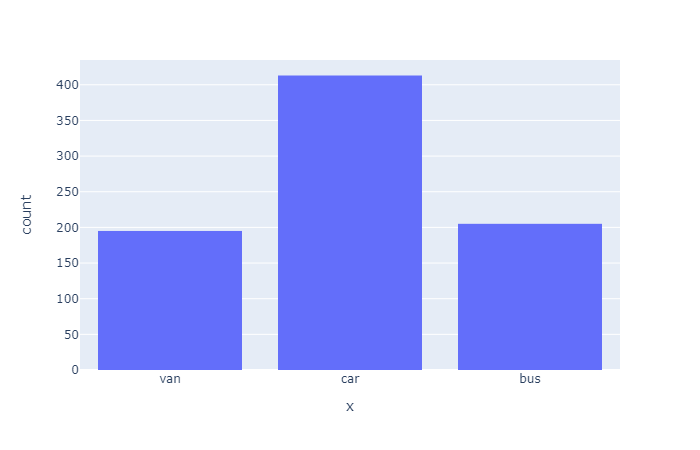

In [9]:
px.histogram(x=df['class'])

### Check for any missing values in the data 

## missing values are dropped above already

### 3. Standardize the data 

In [10]:
## dropping the class variable as its the target and not really requirewd now
df=df.drop('class',axis=1)
col_names=df.columns

In [11]:
df=zs.zscore(df)

Since the dimensions of the data are not really known to us, it would be wise to standardize the data using z scores before we go for any clustering methods.
You can use zscore function to do this

### K - Means Clustering

### 4. Assign a dummy array called distortion

In [12]:
distortion = []

You can later use this array to plot the elbow plot

In [13]:
X=df

### 5. Calculating distortion - C distance

In [14]:
cluster_range = range( 1, 10)   # expect 3 to four clusters from the pair panel visual inspection hence restricting from 2 to 6
cluster_errors = []
cluster_sil_scores = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(X)
  labels = clusters.labels_                     # capture the cluster lables
  centroids = clusters.cluster_centers_         # capture the centroids
  cluster_errors.append( clusters.inertia_ )    # capture the intertia
  distortion.append(sum(np.min(distance.cdist(X, clusters.cluster_centers_, 'euclidean'), axis=1))/ X.shape[0])

Iterating values of k from 1 to 10 fit K means model
Using c distance - Get the measure for Sum of squares error.

In [15]:
# combine the cluster_range and cluster_errors into a dataframe by combining them
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors} )
clusters_df[0:15]


,num_clusters,cluster_errors
0,1,14634.000000
1,2,8623.136976
2,3,7037.467395
3,4,5739.286384
4,5,5186.753590
5,6,4707.860902
6,7,4355.019229
7,8,4161.971787
8,9,3879.831023


### 6. Plotting Elbow/ Scree Plot

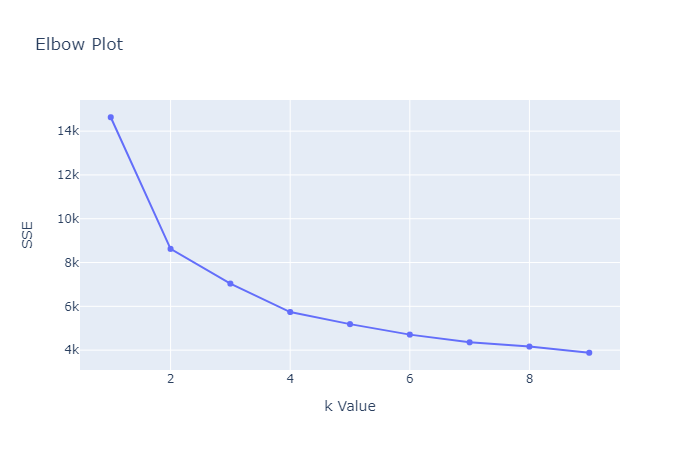

In [16]:
trace1 = {
  "type": "scatter", 
  "x": clusters_df.num_clusters, 
  "y": clusters_df.cluster_errors
}
layout = {
  "title": "Elbow Plot", 
  "xaxis": {"title": "k Value"}, 
  "yaxis": {"title": "SSE"}
}
fig = go.Figure(trace1, layout=layout)
fig.show()

Use Matplotlib to plot the scree plot - Note: Scree plot plots distortion vs the no of clusters

### Find out the optimal value of K

## optimal value for k = 4

### Using optimal value of K - Cluster the data. 
Note: Since the data has more than 2 dimension we cannot visualize the data. As an alternative, we can observe the centroids and note how they are distributed across different dimensions

In [17]:


# Number of clusters

kmeans = KMeans(n_clusters=4)

# Fitting the input data

kmeans = kmeans.fit(X)

You can use kmeans.cluster_centers_ function to pull the centroid information from the instance

### 7. Store the centroids in a dataframe with column names from the original dataset given 

In [18]:

centroids = kmeans.cluster_centers_
centroid_df=pd.DataFrame(centroids,columns=col_names)
centroid_df

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,-0.873939,-0.490667,-0.819988,-1.009148,-0.488357,-0.275961,-0.759560,0.828144,-0.731864,-0.454864,-0.772864,-0.764634,-0.379292,0.660978,-0.109969,-0.297173,-0.941479,-0.974511
1,1.157362,1.186890,1.213767,0.973765,0.094691,0.219180,1.301583,-1.216500,1.306276,1.100690,1.209168,1.312875,1.093702,-0.103893,0.158104,0.269747,-0.001701,0.187217
2,-0.733024,0.072735,-0.272171,2.947683,6.836652,8.696706,-0.535008,0.466248,-0.557406,0.283411,1.697528,-0.588068,0.212701,4.965638,-0.274839,-0.231193,-0.707994,-0.453651
3,-0.177926,-0.612020,-0.297588,0.020451,0.201668,-0.180274,-0.431799,0.286320,-0.463195,-0.574021,-0.397748,-0.435651,-0.641056,-0.709096,-0.028642,0.053769,0.963653,0.814107


Hint: Use pd.Dataframe function 

### Use kmeans.labels_ function to print out the labels of the classes

In [19]:
labels = kmeans.predict(X)
print(labels)
print(len(labels))

[3 3 1 3 2 3 3 3 3 3 3 0 3 1 0 3 1 0 0 3 3 1 3 0 1 1 0 0 3 3 1 3 0 2 1 0 1
 0 0 3 1 0 0 0 0 3 0 3 1 3 1 3 3 0 1 0 1 0 0 0 3 0 1 3 1 1 3 0 3 1 3 0 0 1
 3 0 3 1 3 0 3 0 1 3 1 0 0 1 0 0 1 0 2 3 3 0 1 1 0 0 1 3 0 0 0 0 3 1 1 3 0
 0 3 0 0 0 0 0 3 1 1 3 3 0 1 2 0 3 0 3 3 1 0 3 1 3 3 3 3 1 3 3 1 3 1 3 0 3
 0 1 3 0 1 1 3 1 0 0 1 1 3 1 0 3 3 3 0 1 0 3 0 1 3 3 3 1 3 3 3 1 3 0 1 0 0
 0 0 3 1 1 3 0 3 0 1 3 0 3 1 0 0 1 0 3 1 0 0 0 3 1 3 1 0 0 0 0 1 3 0 3 1 0
 3 3 0 1 0 0 3 3 1 0 1 0 3 0 1 3 3 1 1 0 3 3 3 1 0 3 3 0 0 3 3 1 3 0 0 1 3
 3 0 0 1 0 0 1 0 0 2 0 3 1 3 1 0 3 3 1 3 3 3 0 0 1 1 1 1 0 0 1 0 0 0 3 0 1
 1 0 1 3 0 1 0 3 3 1 1 0 1 1 0 1 3 3 3 0 0 1 1 1 3 3 3 1 0 3 0 1 3 3 1 3 1
 1 1 3 0 0 1 0 0 0 0 3 3 3 0 1 1 0 0 1 0 1 0 1 0 0 3 0 2 1 0 3 3 0 1 3 3 3
 3 1 3 1 3 1 3 0 0 0 3 3 0 0 3 0 1 3 3 0 0 1 3 0 3 3 1 3 1 3 1 1 0 0 1 3 0
 0 3 1 1 0 0 1 1 0 1 1 1 3 3 3 3 3 1 0 0 3 1 3 3 1 3 0 1 0 0 1 3 0 1 1 1 0
 1 1 0 3 0 1 1 3 0 0 0 1 3 0 1 1 3 0 1 1 3 0 0 1 1 1 0 0 1 1 1 3 3 1 0 3 1
 3 0 0 3 1 0 3 3 0 2 1 3 

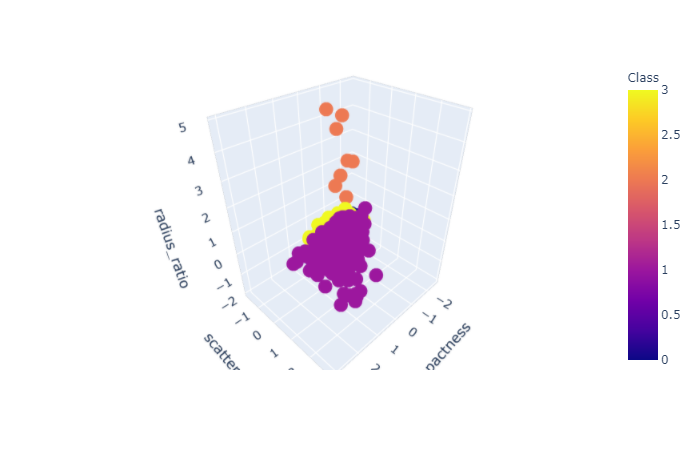

In [20]:
X_df = pd.DataFrame(X, columns= col_names)
X_df['Class']=labels
X_df.sample(5)
px.scatter_3d(data_frame=X_df,x='compactness',y='scatter_ratio',z='radius_ratio',color='Class')

## Hierarchical Clustering 

### 8. Variable creation

For Hierarchical clustering, we will create datasets using multivariate normal distribution to visually observe how the clusters are formed at the end

In [21]:
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
c = np.random.multivariate_normal([10, 20], [[3, 1], [1, 4]], size=[100,])

### 9. Combine all three arrays a,b,c into a dataframe

In [22]:
df=pd.DataFrame(data=np.concatenate((a,b,c),axis=0),columns=['col_1','col_2'])
df

,col_1,col_2
0,11.683499,1.414622
1,11.424745,0.602796
2,7.817439,3.569447
3,8.793315,-0.225822
4,9.330831,0.664787
...,...,...
245,10.129948,21.730881
246,10.024125,18.606404
247,10.892533,20.278179
248,9.526049,22.653488


### 10. Use scatter matrix to print all the 3 distributions

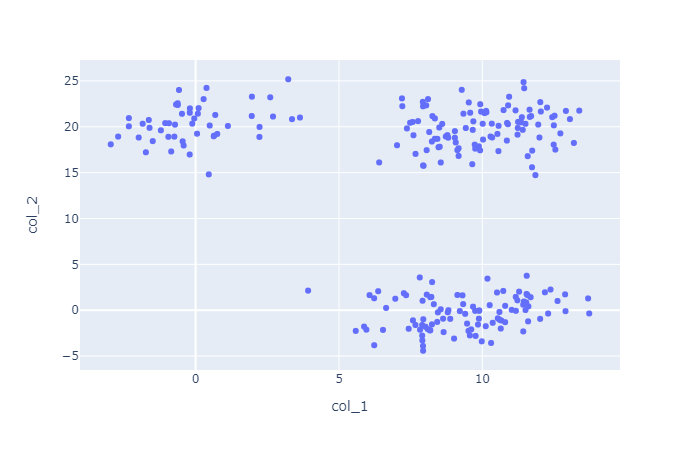

In [23]:
px.scatter(data_frame=df,x='col_1',y='col_2')

### 11. Find out the linkage matrix

In [24]:
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='ward')
model.fit(df)
df['labels'] = model.labels_
df.groupby(["labels"]).count()
df_clusters = df.groupby(['labels'])
df_groups=df_clusters.head(1599)#This creates a pandas dataframegroupby object

Use ward as linkage metric and distance as Eucledian

In [25]:
Z = linkage(df, 'average')

### 12. Plot the dendrogram for the consolidated dataframe

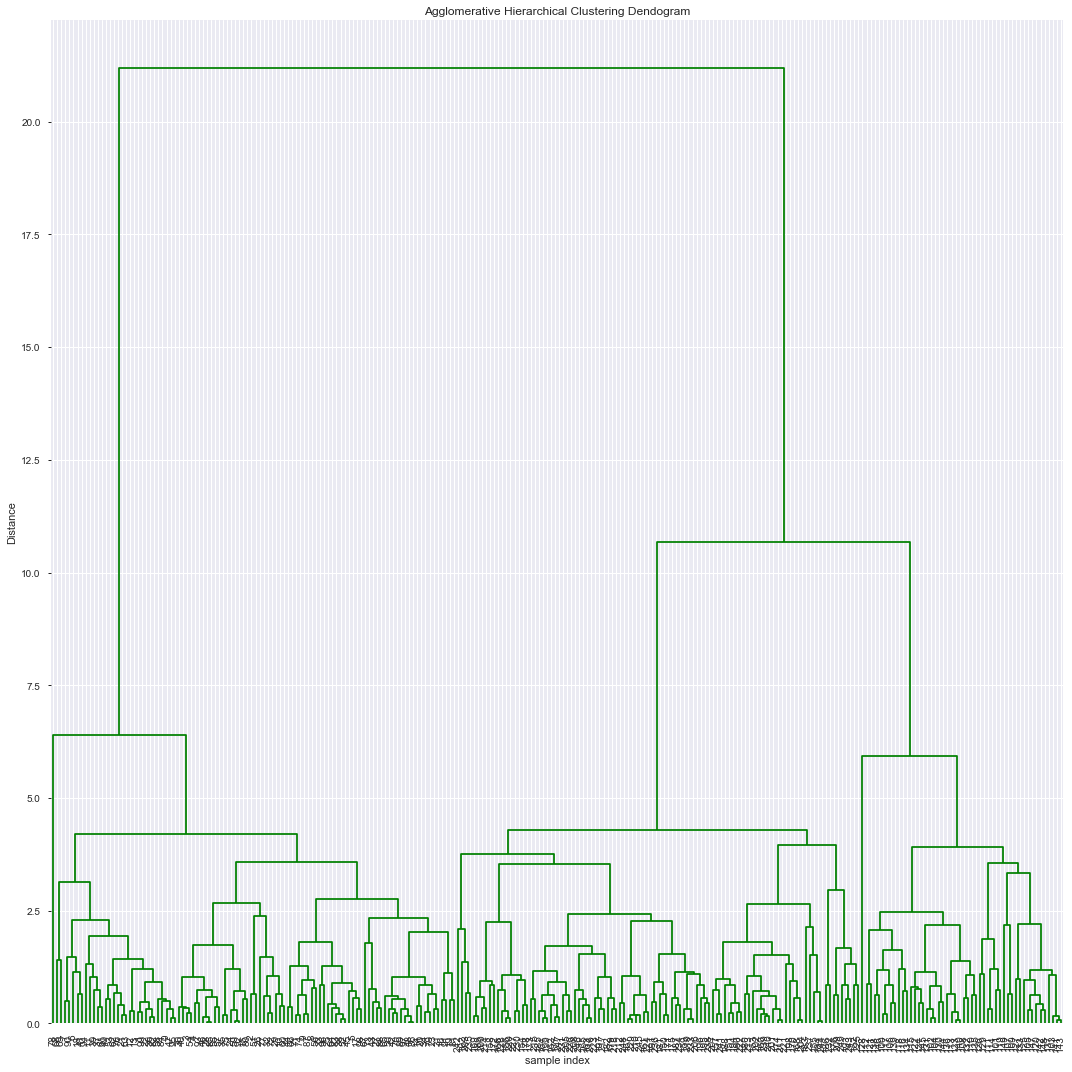

In [26]:
plt.figure(figsize=(15, 15))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold=600,  leaf_font_size=10. )
plt.tight_layout()

### 13. Recreate the dendrogram for last 12 merged clusters 

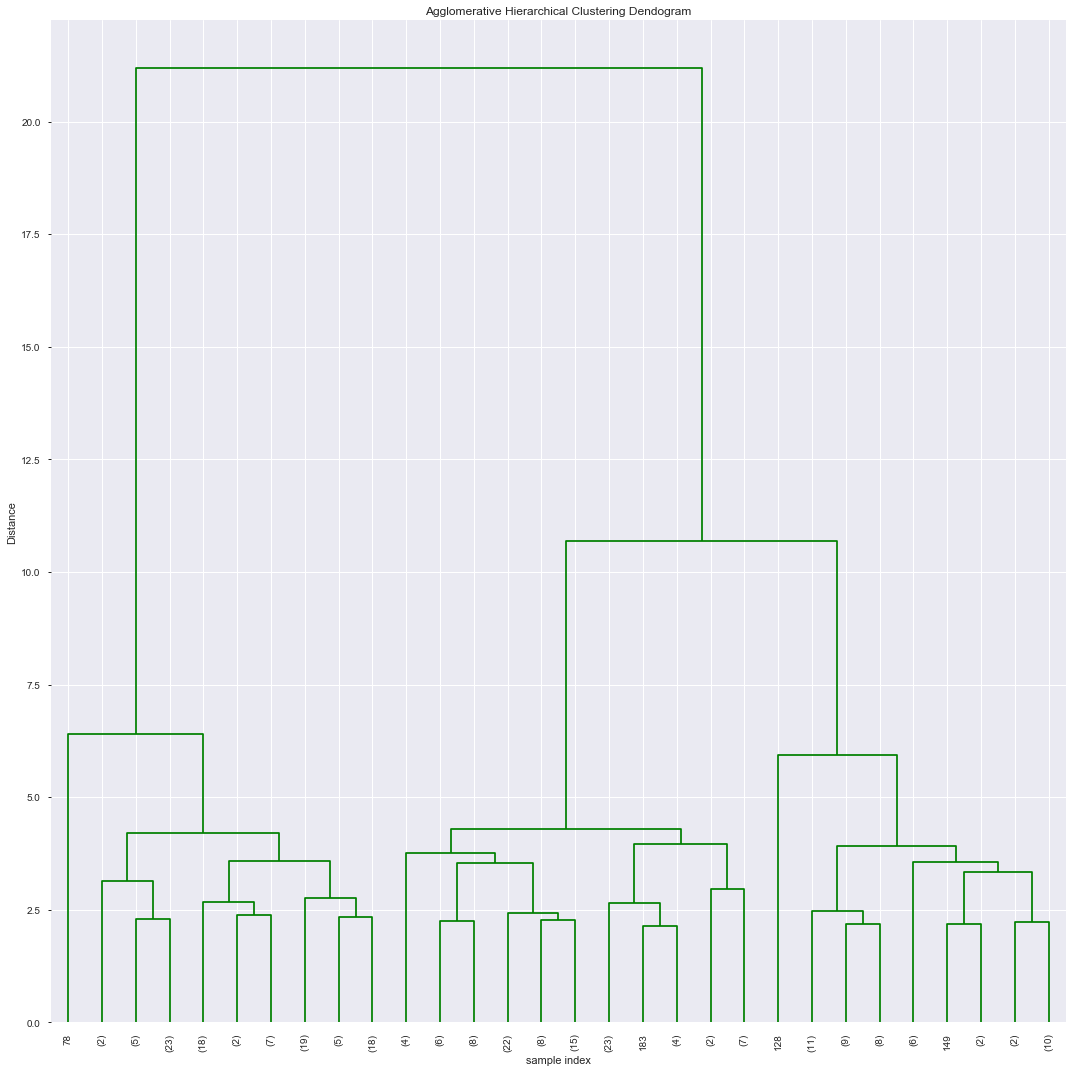

In [27]:
plt.figure(figsize=(15, 15))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold=600,  leaf_font_size=10.,truncate_mode='lastp' )
plt.tight_layout()

Hint: Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram 

### 14. From the truncated dendrogram, find out the optimal distance between clusters which u want to use an input for clustering data

In [28]:
c, coph_dists = cophenet(Z , pdist(df))

c

0.9613633288617064

### 15. Using this distance measure and fcluster function to cluster the data into 3 different groups

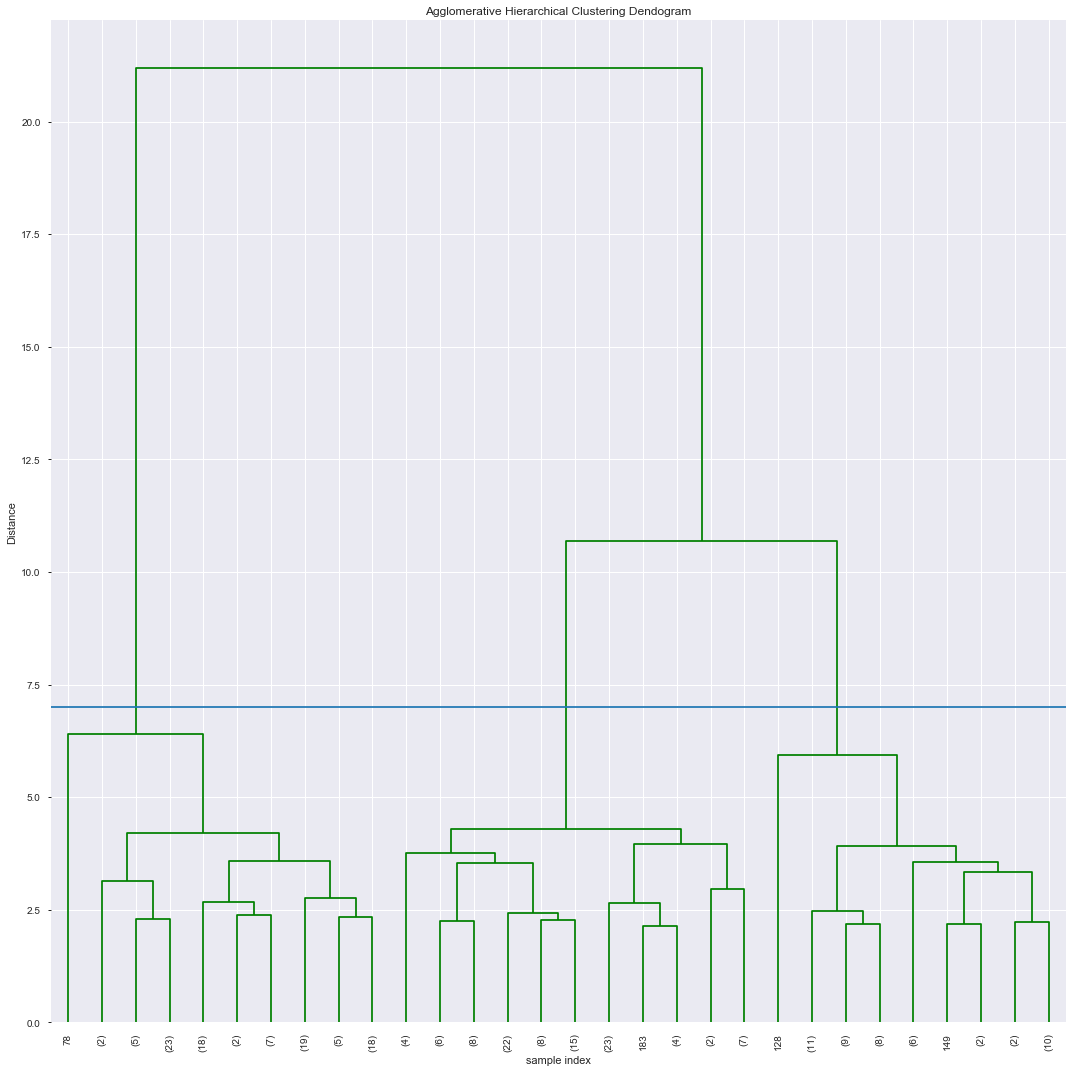

In [33]:
plt.figure(figsize=(15, 15))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold=600,  leaf_font_size=10.,truncate_mode='lastp' )
plt.axhline(y=7)
plt.tight_layout()

In [34]:
cluster=fcluster(Z,t=7,criterion='distance')

### Use matplotlib to visually observe the clusters in 2D space 

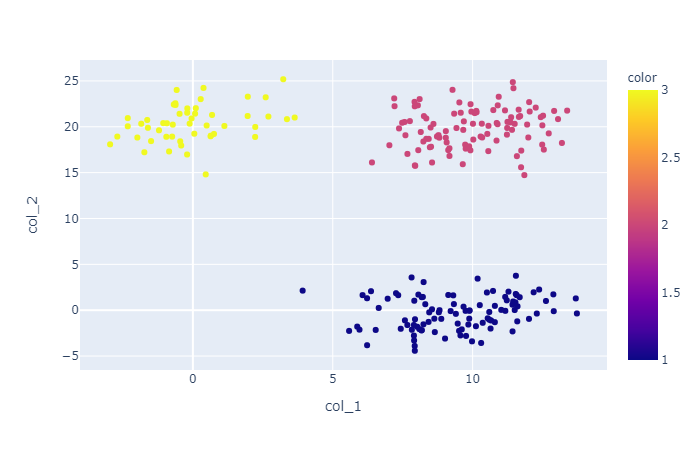

In [35]:
px.scatter(data_frame=df,x='col_1',y='col_2',color=cluster)